In [1]:


import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import librosa
import librosa.display



# data loading 

In [6]:


mfcc_data = pd.read_csv("/kaggle/input/processed-features/processed_features.csv")
gfcc_data = pd.read_csv("/kaggle/input/gfcc-features/processed_gfcc_features.csv")

mfcc_data

,id,species,MFCC_1,MFCC_2,MFCC_3,MFCC_4,MFCC_5,MFCC_6,MFCC_7,MFCC_8,...,Chroma_10,Chroma_11,Chroma_12,SpectralContrast_1,SpectralContrast_2,SpectralContrast_3,SpectralContrast_4,SpectralContrast_5,SpectralContrast_6,SpectralContrast_7
0,98575,3,-361.656036,125.103020,-24.237740,24.354500,-42.764210,30.622377,-12.468376,0.291034,...,0.470240,0.460751,0.435419,10.418225,7.837694,10.307771,12.716323,18.492139,16.950817,40.141169
1,79695,3,-392.915283,104.502510,28.269146,15.395481,9.663835,3.313091,6.793124,16.478239,...,0.752954,0.638742,0.569467,25.248209,8.038030,10.272026,13.681690,18.588676,28.467509,33.345144
2,466294,3,-301.852112,73.181976,-45.758297,76.682396,10.930926,9.061771,14.536531,20.168795,...,0.294513,0.297144,0.328910,9.793578,9.088002,10.642222,13.239060,19.224052,22.321314,44.213839
3,357929,3,-598.965332,58.137348,-33.001987,12.708969,4.436345,-15.157086,2.794906,5.597064,...,0.393217,0.394424,0.398078,10.931936,8.657767,11.224007,14.409275,17.076797,24.215923,23.434148
4,439730,3,-516.878723,93.521217,-13.180176,48.266064,-9.793306,25.971178,-8.475965,6.214233,...,0.419411,0.444484,0.516145,14.379374,9.065961,11.908001,13.602245,19.887671,18.270207,31.502205
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1461,267100,6,-328.093353,120.954659,-59.249649,-3.398238,-19.328472,41.629570,18.453911,-10.237924,...,0.305848,0.322821,0.482326,9.783822,8.855366,10.119687,15.859270,24.295518,19.691814,47.602996
1462,435845,6,-184.782166,124.972191,1.451991,25.818333,7.715702,52.812191,-3.544820,17.368273,...,0.714160,0.715407,0.727639,18.373803,9.677632,10.792634,13.475038,16.769420,14.715888,42.310812
1463,161191,6,-408.711578,47.288143,-51.306339,46.421265,11.573908,52.992527,-15.654189,-12.575765,...,0.077376,0.092779,0.143110,10.791350,9.136098,11.262757,13.621829,30.653560,24.245362,42.047220
1464,207166,6,-372.791504,80.216736,-107.843292,11.992028,-35.050690,12.895589,-17.662146,-5.886674,...,0.543939,0.457534,0.419334,14.221280,9.864147,11.870570,15.143153,15.743279,14.818054,37.254095


In [7]:
mfcc_data.shape

(1466, 61)

In [8]:
gfcc_data

,id,species,gfcc_1,gfcc_2,gfcc_3,gfcc_4,gfcc_5,gfcc_6,gfcc_7,gfcc_8,gfcc_9,gfcc_10,gfcc_11,gfcc_12,gfcc_13
0,98575,3,-361.65604,125.103020,-24.237740,24.354500,-42.764210,30.622377,-12.468376,0.291034,-6.288420,12.533349,-15.641005,12.048239,-12.588051
1,79695,3,-392.91528,104.502510,28.269146,15.395481,9.663835,3.313091,6.793124,16.478240,17.283064,1.332962,7.481407,20.132149,6.226738
2,466294,3,-301.85210,73.181980,-45.758297,76.682396,10.930926,9.061771,14.536531,20.168795,-9.834109,9.571710,3.025145,0.689051,1.182343
3,357929,3,-598.96533,58.137350,-33.001987,12.708969,4.436345,-15.157086,2.794906,5.597065,-8.173599,-0.616125,-0.602680,-13.189666,0.625585
4,439730,3,-516.87870,93.521220,-13.180176,48.266064,-9.793306,25.971178,-8.475965,6.214233,-4.990967,21.587055,-10.235194,-9.228932,-6.878540
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1471,267100,6,-328.09335,120.954660,-59.249650,-3.398238,-19.328472,41.629570,18.453910,-10.237924,8.297959,-2.518074,8.286176,12.557579,-17.548540
1472,435845,6,-184.78217,124.972190,1.451991,25.818333,7.715702,52.812190,-3.544820,17.368273,-7.895533,21.655275,6.302188,10.252441,4.186343
1473,161191,6,-408.71158,47.288143,-51.306340,46.421265,11.573908,52.992527,-15.654189,-12.575765,4.558959,31.665352,16.741623,-22.110890,-11.978414
1474,207166,6,-372.79150,80.216736,-107.843290,11.992028,-35.050690,12.895589,-17.662146,-5.886674,-20.525560,-2.770795,-10.599387,3.099948,-9.166494


In [87]:
merged_data = pd.merge(mfcc_data, gfcc_data, on="id", how="inner")

In [10]:
merged_data.shape

(1466, 75)

In [28]:
merged_data

,id,species_x,MFCC_1,MFCC_2,MFCC_3,MFCC_4,MFCC_5,MFCC_6,MFCC_7,MFCC_8,...,gfcc_4,gfcc_5,gfcc_6,gfcc_7,gfcc_8,gfcc_9,gfcc_10,gfcc_11,gfcc_12,gfcc_13
0,98575,3,-361.656036,125.103020,-24.237740,24.354500,-42.764210,30.622377,-12.468376,0.291034,...,24.354500,-42.764210,30.622377,-12.468376,0.291034,-6.288420,12.533349,-15.641005,12.048239,-12.588051
1,79695,3,-392.915283,104.502510,28.269146,15.395481,9.663835,3.313091,6.793124,16.478239,...,15.395481,9.663835,3.313091,6.793124,16.478240,17.283064,1.332962,7.481407,20.132149,6.226738
2,466294,3,-301.852112,73.181976,-45.758297,76.682396,10.930926,9.061771,14.536531,20.168795,...,76.682396,10.930926,9.061771,14.536531,20.168795,-9.834109,9.571710,3.025145,0.689051,1.182343
3,357929,3,-598.965332,58.137348,-33.001987,12.708969,4.436345,-15.157086,2.794906,5.597064,...,12.708969,4.436345,-15.157086,2.794906,5.597065,-8.173599,-0.616125,-0.602680,-13.189666,0.625585
4,439730,3,-516.878723,93.521217,-13.180176,48.266064,-9.793306,25.971178,-8.475965,6.214233,...,48.266064,-9.793306,25.971178,-8.475965,6.214233,-4.990967,21.587055,-10.235194,-9.228932,-6.878540
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1461,267100,6,-328.093353,120.954659,-59.249649,-3.398238,-19.328472,41.629570,18.453911,-10.237924,...,-3.398238,-19.328472,41.629570,18.453910,-10.237924,8.297959,-2.518074,8.286176,12.557579,-17.548540
1462,435845,6,-184.782166,124.972191,1.451991,25.818333,7.715702,52.812191,-3.544820,17.368273,...,25.818333,7.715702,52.812190,-3.544820,17.368273,-7.895533,21.655275,6.302188,10.252441,4.186343
1463,161191,6,-408.711578,47.288143,-51.306339,46.421265,11.573908,52.992527,-15.654189,-12.575765,...,46.421265,11.573908,52.992527,-15.654189,-12.575765,4.558959,31.665352,16.741623,-22.110890,-11.978414
1464,207166,6,-372.791504,80.216736,-107.843292,11.992028,-35.050690,12.895589,-17.662146,-5.886674,...,11.992028,-35.050690,12.895589,-17.662146,-5.886674,-20.525560,-2.770795,-10.599387,3.099948,-9.166494


In [29]:
y = merged_data['species_x']
y = np.array(y)

In [11]:
df = merged_data

In [31]:
df


,id,species_x,MFCC_1,MFCC_2,MFCC_3,MFCC_4,MFCC_5,MFCC_6,MFCC_7,MFCC_8,...,gfcc_4,gfcc_5,gfcc_6,gfcc_7,gfcc_8,gfcc_9,gfcc_10,gfcc_11,gfcc_12,gfcc_13
0,98575,3,-361.656036,125.103020,-24.237740,24.354500,-42.764210,30.622377,-12.468376,0.291034,...,24.354500,-42.764210,30.622377,-12.468376,0.291034,-6.288420,12.533349,-15.641005,12.048239,-12.588051
1,79695,3,-392.915283,104.502510,28.269146,15.395481,9.663835,3.313091,6.793124,16.478239,...,15.395481,9.663835,3.313091,6.793124,16.478240,17.283064,1.332962,7.481407,20.132149,6.226738
2,466294,3,-301.852112,73.181976,-45.758297,76.682396,10.930926,9.061771,14.536531,20.168795,...,76.682396,10.930926,9.061771,14.536531,20.168795,-9.834109,9.571710,3.025145,0.689051,1.182343
3,357929,3,-598.965332,58.137348,-33.001987,12.708969,4.436345,-15.157086,2.794906,5.597064,...,12.708969,4.436345,-15.157086,2.794906,5.597065,-8.173599,-0.616125,-0.602680,-13.189666,0.625585
4,439730,3,-516.878723,93.521217,-13.180176,48.266064,-9.793306,25.971178,-8.475965,6.214233,...,48.266064,-9.793306,25.971178,-8.475965,6.214233,-4.990967,21.587055,-10.235194,-9.228932,-6.878540
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1461,267100,6,-328.093353,120.954659,-59.249649,-3.398238,-19.328472,41.629570,18.453911,-10.237924,...,-3.398238,-19.328472,41.629570,18.453910,-10.237924,8.297959,-2.518074,8.286176,12.557579,-17.548540
1462,435845,6,-184.782166,124.972191,1.451991,25.818333,7.715702,52.812191,-3.544820,17.368273,...,25.818333,7.715702,52.812190,-3.544820,17.368273,-7.895533,21.655275,6.302188,10.252441,4.186343
1463,161191,6,-408.711578,47.288143,-51.306339,46.421265,11.573908,52.992527,-15.654189,-12.575765,...,46.421265,11.573908,52.992527,-15.654189,-12.575765,4.558959,31.665352,16.741623,-22.110890,-11.978414
1464,207166,6,-372.791504,80.216736,-107.843292,11.992028,-35.050690,12.895589,-17.662146,-5.886674,...,11.992028,-35.050690,12.895589,-17.662146,-5.886674,-20.525560,-2.770795,-10.599387,3.099948,-9.166494


In [ ]:
df = df.drop("id" , axis = 1)
df = df.drop("species_x" ,axis = 1)
df = df.drop("species_y" , axis = 1)

In [127]:
X = np.array(df)

In [128]:
X

array([[-361.65603638,  125.10301971,  -24.23773956, ...,  -15.641005  ,
          12.048239  ,  -12.588051  ],
       [-392.9152832 ,  104.50251007,   28.26914597, ...,    7.481407  ,
          20.132149  ,    6.2267385 ],
       [-301.85211182,   73.18197632,  -45.75829697, ...,    3.0251448 ,
           0.68905145,    1.1823432 ],
       ...,
       [-408.71157837,   47.28814316,  -51.30633926, ...,   16.741623  ,
         -22.11089   ,  -11.978414  ],
       [-372.79150391,   80.21673584, -107.84329224, ...,  -10.599387  ,
           3.099948  ,   -9.166494  ],
       [-334.99520874,  115.7687149 ,  -16.42815018, ...,   11.710922  ,
           4.29809   ,    3.4738264 ]])

In [113]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

mmscale = MinMaxScaler()

X_sc = mmscale.fit_transform(X)

In [129]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation

model = Sequential()

model.add(Dense(250, input_shape=(72,), activation='relu'))

model.add(Dense(250, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))

model.add(Dropout(0.5))

model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

model.summary()

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                 │ (None, 250)            │        18,250 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 250)            │        62,750 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 128)            │        32,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 135,154 (527.95 KB)

 Trainable params: 135,154 (527.95 KB)

 Non-trainable params: 0 (0.00 B)

In [163]:
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# One-hot encode the target variable (if not already encoded)
y_encoded = to_categorical(y, num_classes=10)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=15)

In [167]:
import joblib 
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [164]:
history = model.fit(X_train, y_train, 
                    validation_data=(X_test, y_test), 
                    epochs=20, 
                    batch_size=32)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

Epoch 1/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9428 - loss: 0.3264 - val_accuracy: 0.9626 - val_loss: 0.1346
Epoch 2/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9571 - loss: 0.1516 - val_accuracy: 0.9660 - val_loss: 0.0884
Epoch 3/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9577 - loss: 0.1198 - val_accuracy: 0.9626 - val_loss: 0.1357
Epoch 4/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9477 - loss: 0.2254 - val_accuracy: 0.9524 - val_loss: 0.1693
Epoch 5/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9649 - loss: 0.1323 - val_accuracy: 0.9626 - val_loss: 0.1321
Epoch 6/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9639 - loss: 0.1892 - val_accuracy: 0.9558 - val_loss: 0.1683
Epoch 7/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9713 - loss: 0.1067 - val_accuracy: 0.9626 - val_loss: 0.0967
Epoch 8/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9659 - loss: 0.0920 - val_accuracy: 0.9694 - val_loss:

In [165]:
from tensorflow.keras.models import load_model

model.save('xenocanto.h5')


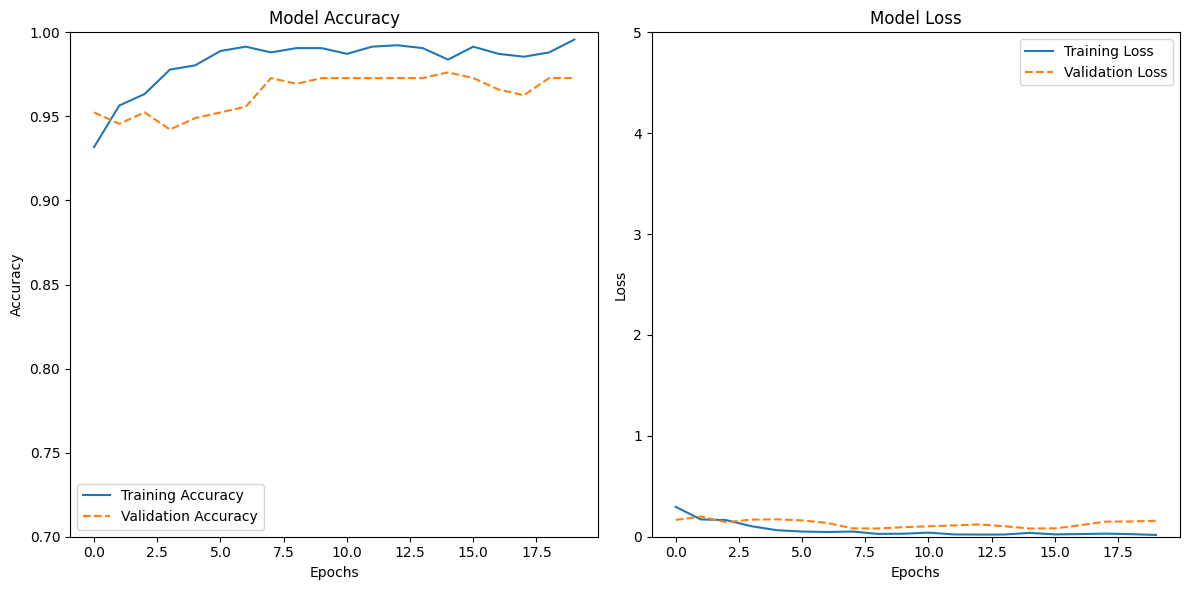

In [38]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', linestyle='--')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim(0.7, 1)  # Set y-axis range for accuracy (70% to 95%)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss', linestyle='--')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.ylim(0 , 5)
plt.legend()

plt.tight_layout()
plt.show()
